Análisis de datos usando Pandas --- 11:16 min
===

* 11:16 min | Última modificación: Octubre 6, 2021 | [YouTube](https://youtu.be/TfLyGICuRhc)

Una de los principales usos de Pandas es el análisis de datos organizados en tablas. En este análisis se incluye el cómputo de KPIs y la agregación, filtrado y graficación de datos.

Al finalizar el documento, usted estará en capacidad:

* Cargar datos almacenados en archivos CSV disponibles en un repo en GitHub.

* Computar variables a partir de los datos en un dataframe.

* Filtrar registros.

* Determinar si hay valores nulos en una columna y transformarlos.

* Generar columnas calculadas.

* Agregar datos usndo groupby.

* Graficar agregaciones.

Este ejemplo está basado en el tutorial de Spark de HortoWorks, disponible en https://es.hortonworks.com/tutorial/learning-spark-sql-with-zeppelin/

## Descripción de los campos del archivo

El archivo usado contiene la información sobre vuelos entre 1987 y 2008, y cuenta con los siguientes campos:

* Year: 1987-2008

* Month: 1-12

* DayofMonth: 1-31

* DayOfWeek: 1 (Monday) - 7 (Sunday)

* DepTime: actual departure time (local, hhmm)

* CRSDepTime: scheduled departure time (local, hhmm)

* ArrTime: actual arrival time (local, hhmm)

* CRSArrTime: scheduled arrival time (local, hhmm)

* UniqueCarrier: unique carrier code

* FlightNum: flight number

* TailNum: plane tail number

* ActualElapsedTime: in minutes

* CRSElapsedTime: in minutes

* AirTime: in minutes

* ArrDelay: arrival delay, in minutes

* DepDelay: departure delay, in minutes

* Origin: origin IATA airport code

* Dest: destination IATA airport code

* Distance: in miles

* TaxiIn: taxi in time, in minutes

* TaxiOut: taxi out time in minutes

* Cancelled: was the flight cancelled?

* CancellationCode: reason for cancellation (A = carrier, B = weather, C = NAS, D = security)

* Diverted: 1 = yes, 0 = no

* CarrierDelay: in minutes

* WeatherDelay: in minutes

* NASDelay: in minutes

* SecurityDelay: in minutes

* LateAircraftDelay: in minutes

Se desea analizar la cantidad de vuelos retrasados por transportador.

## Preparación

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

pd.set_option("display.notebook_repr_html", False)

## Carga de datos

In [2]:
flights = pd.read_csv(
    "https://raw.githubusercontent.com/jdvelasq/playground/master/datasets/flights.csv",
    sep=",",
    thousands=None,
    decimal=".",
)

flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               99999 non-null  int64  
 1   Month              99999 non-null  int64  
 2   DayofMonth         99999 non-null  int64  
 3   DayOfWeek          99999 non-null  int64  
 4   DepTime            98857 non-null  float64
 5   CRSDepTime         99999 non-null  int64  
 6   ArrTime            98697 non-null  float64
 7   CRSArrTime         99999 non-null  int64  
 8   UniqueCarrier      99999 non-null  object 
 9   FlightNum          99999 non-null  int64  
 10  TailNum            98857 non-null  object 
 11  ActualElapsedTime  98697 non-null  float64
 12  CRSElapsedTime     99999 non-null  int64  
 13  AirTime            98697 non-null  float64
 14  ArrDelay           98697 non-null  float64
 15  DepDelay           98857 non-null  float64
 16  Origin             999

## Estadísticos de las columnas numéricas

In [3]:
flights.describe()

          Year    Month    DayofMonth     DayOfWeek       DepTime  \
count  99999.0  99999.0  99999.000000  99999.000000  98857.000000   
mean    2008.0      1.0     17.087741      3.890059   1355.194827   
std        0.0      0.0      8.356321      1.953000    464.088277   
min     2008.0      1.0      1.000000      1.000000      1.000000   
25%     2008.0      1.0     10.000000      2.000000    942.000000   
50%     2008.0      1.0     17.000000      4.000000   1344.000000   
75%     2008.0      1.0     24.000000      5.000000   1743.000000   
max     2008.0      1.0     31.000000      7.000000   2359.000000   

         CRSDepTime       ArrTime    CRSArrTime     FlightNum  \
count  99999.000000  98697.000000  99999.000000  99999.000000   
mean    1341.983470   1492.730964   1502.593996   1510.586886   
std      451.355345    496.372525    478.096654   1185.974280   
min      600.000000      1.000000      5.000000      1.000000   
25%      940.000000   1114.000000   1120.000000    50

## Visualización de un subconjunto de columnas

In [4]:
flights[
    [
        "UniqueCarrier",
        "FlightNum",
        "DepDelay",
        "ArrDelay",
        "Distance",
    ]
].head()

  UniqueCarrier  FlightNum  DepDelay  ArrDelay  Distance
0            WN        335       8.0     -14.0       810
1            WN       3231      19.0       2.0       810
2            WN        448       8.0      14.0       515
3            WN       1746      -4.0      -6.0       515
4            WN       3920      34.0      34.0       515

## Cómputo del total de registros de la tabla

In [5]:
numTotalFlights = len(flights)
numTotalFlights

99999

## Filtrado de registros para vuelos retrasados

In [6]:
#
# Un vuelo con un retrazo mayor a 15 minutos se considera retrasado
# (columna DepDelay).
#
delayedFlights = flights[flights["DepDelay"] > 15][["UniqueCarrier", "DepDelay"]]
delayedFlights.head(5)

   UniqueCarrier  DepDelay
1             WN      19.0
4             WN      34.0
5             WN      25.0
6             WN      67.0
11            WN      94.0

## Cálculo del porcentaje de vuelos retrasados

In [7]:
numDelayedFlights = len(delayedFlights)
print(
    "Porcentaje de vuelos retrasados: "
    + str(round(numDelayedFlights / numTotalFlights * 100, 2))
    + "%"
)

Porcentaje de vuelos retrasados: 19.59%


## Copia de una tabla y copia de columnas

In [8]:
flightsWithDelays = flights[
    [
        "Year",
        "Month",
        "DayofMonth",
        "UniqueCarrier",
        "FlightNum",
        "DepDelay",
    ]
].copy()

#
# Crea una nueva columna como copia de una existente.
#
flightsWithDelays["IsDelayed"] = flightsWithDelays["DepDelay"].copy()

## Conteo de registros nulos en una columna

In [9]:
flightsWithDelays.IsDelayed.isna().sum()

1142

## Aplicación de una función a una columna

In [10]:
flightsWithDelays["IsDelayed"] = flightsWithDelays["IsDelayed"].map(
    lambda x: 0 if np.isnan(x) else x
)

flightsWithDelays["IsDelayed"] = flightsWithDelays["IsDelayed"].map(
    lambda x: 1 if x > 15 else 0
)

flightsWithDelays[["DepDelay", "IsDelayed"]].head(10)

   DepDelay  IsDelayed
0       8.0          0
1      19.0          1
2       8.0          0
3      -4.0          0
4      34.0          1
5      25.0          1
6      67.0          1
7      -1.0          0
8       2.0          0
9       0.0          0

## Cálculo del porcentaje de vuelos retrasados

In [11]:
print(
    "Porcentaje de vuelos retrasados: {:4.2f} %".format(
        100 * flightsWithDelays.IsDelayed.sum() / flightsWithDelays.DepDelay.count()
    )
)

Porcentaje de vuelos retrasados: 19.81 %


## Cantidad de vuelos retrasados por transportador

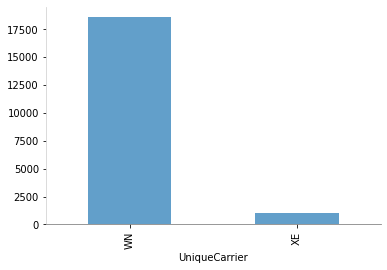

In [12]:
flights["IsDelayed"] = flights["DepDelay"].copy()

flights["IsDelayed"] = flights["IsDelayed"].map(lambda x: 0 if np.isnan(x) else x)

flights["IsDelayed"] = flights["IsDelayed"].map(lambda x: int(x > 15))

(flights.groupby("UniqueCarrier").sum())["IsDelayed"].plot.bar(
    color="tab:blue",
    alpha=0.7,
)

plt.gca().spines["left"].set_color("lightgray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.show()

## Retrasos por día de la semana

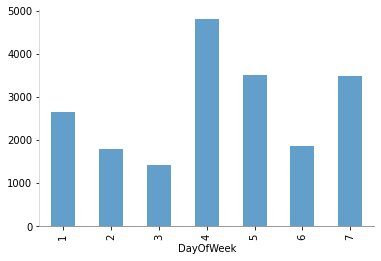

In [13]:
(flights.groupby("DayOfWeek").sum())["IsDelayed"].plot.bar(
    color="tab:blue",
    alpha=0.7,
)

plt.gca().spines["left"].set_color("lightgray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.show()

## Retrasos por hora del día

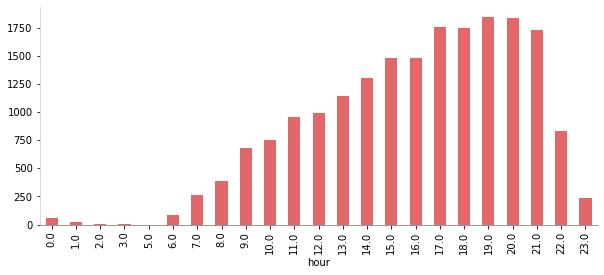

In [14]:
flights["hour"] = flights["DepTime"].copy()

flights["hour"] = flights["hour"].map(lambda x: int(x / 100) if not np.isnan(x) else x)

(flights.groupby("hour").sum())["IsDelayed"].plot.bar(
    color="tab:red",
    alpha=0.7,
    figsize=(10, 4),
)

plt.gca().spines["left"].set_color("lightgray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.show()